<a href="https://colab.research.google.com/github/saebswaity/path-extractio-algorithm-from-an-image/blob/main/extract_path_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(401, 573)
[39503  2637] 39503
maxi=  [1]
True


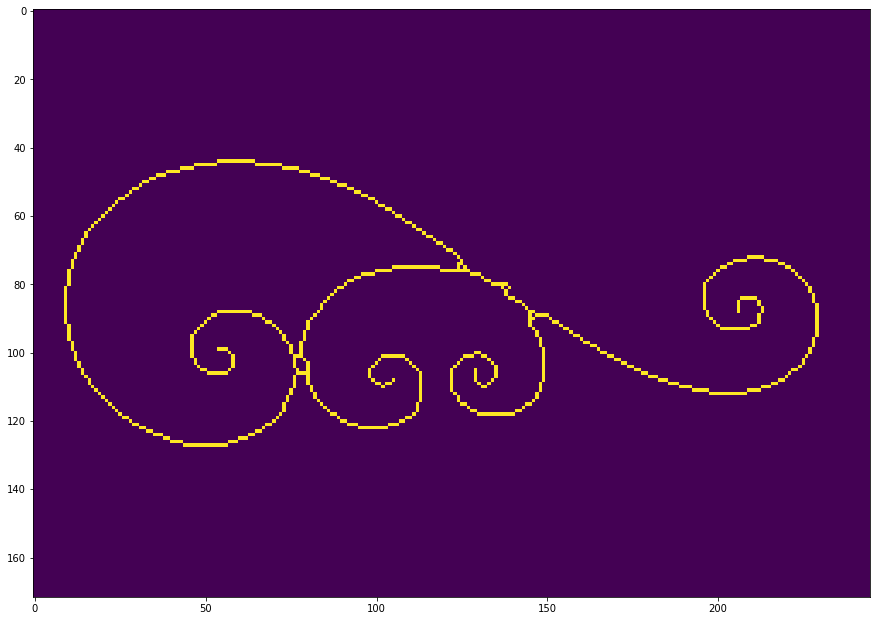

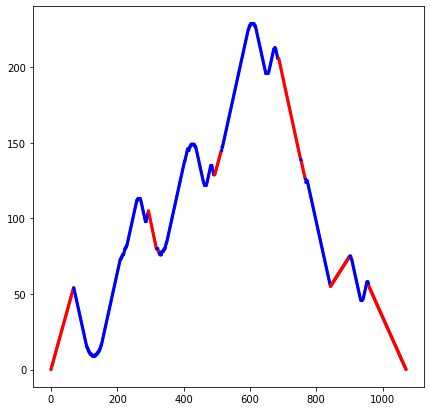

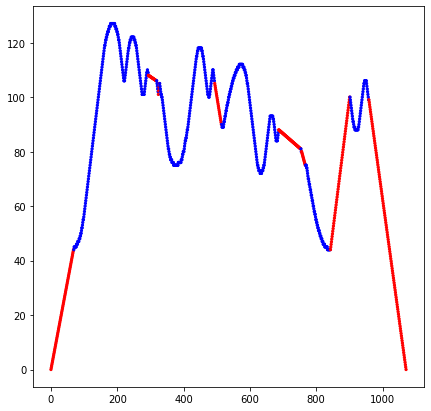

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from numpy import invert, ndarray ,pi
import numpy
import skimage
from matplotlib import collections as mc
from matplotlib.animation import FuncAnimation
import matplotlib.animation as ani
from skimage.io import imread
import skimage.transform


im1=imread('/content/drive/MyDrive/research paper/path4.jpg')
img=im1

T=0


try:
 
 img=skimage.color.rgb2gray(img)
 imgg=img
 
except:
 print("An exception occurred")
    
sig=0.01

print(img.shape)
a,b=img.shape
#resize the image :
#######################################################
scale1=300
sca=scale1/(a**2+b**2)**.5 
img = skimage.transform.resize(img, (int(a*sca), int(b*sca)),anti_aliasing=False)
img1=img

a,b=img.shape

sizeim=img.shape

img=threshold(img)

imgmax=max_area_object(img)

imgskel=skeletonize_image(imgmax)

#ax.show()
imggraph=binary_image_to_graph(imgskel)
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(imgskel)
path=extract_path(imggraph)
#create two signals X Y from the path:
#######################################################
path=list(path)
points=[]
for i in path:
    points.append(i[0])



points=np.array(points)
X= points[:,0]
Y= points[:,1]
X,Y,linesonoff=remove_duplication(X,Y)
plt.figure(figsize=(7, 7))

colorss=np.array(list(map(lambda x:'red' if x==1 else "blue",linesonoff)))

plt.scatter(np.arange(len(Y)),Y,s=5,c=colorss)

plt.show()
plt.figure(figsize=(7, 7))
plt.scatter(np.arange(len(X)),X,s=5,c=colorss)







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

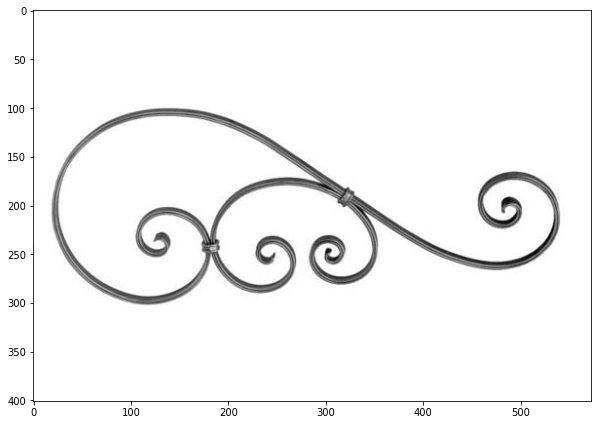

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create a figure and axes
#fig = plt.figure(figsize=(7,7))
fig, ax = plt.subplots(figsize=(10,10))

# set up the subplots as needed

#ax.set_xlim(( 0, b))            
#ax.set_ylim((0, a))
ax.imshow(imgg,cmap='gray')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.

line1, = ax.plot([], [], 'r.', ms=20)     # ax.plot returns a list of 2D line objects
line2, = ax.plot([], [], 'o', ms=15)


In [ ]:
# animation function. This is called sequentially
jump1=1
ss=1
frnum=int(len(X)*ss)
print(frnum)
c=[0]
def drawframe(i):
  global X
  global Y
  global c
  x=X/sca
  y=Y/sca
  #x=X
  #y=Y

  
  ii=int(len(X)/frnum*i)
  
  if linesonoff[ii]==0:
    
    line1.set_data(y[ii], x[ii])
    line2.set_data(y[c],x[c])
    if c[-1]-ii>-15:
      c=c+list(range(c[-1],ii))
    else:
      c=c+[ii]

    
    
    
  else:
    line1.set_data(y[ii], x[ii])
    line2.set_data(y[c],x[c])

  
  
  return (line2,)

1072


In [ ]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=frnum, interval=3, blit=True)

In [ ]:
from IPython.display import HTML
import matplotlib.pyplot as plt

HTML(anim.to_html5_video())#%%%##!!@$%!%#!@%#@@#%!


In [ ]:
%matplotlib inline
import numpy as np

from matplotlib import pyplot as plt
from numpy import invert, ndarray ,pi
import numpy
from scipy import ndimage
import skimage
from skimage.morphology import skeletonize
from skimage.morphology import thin
from skimage.morphology import medial_axis
from skimage.io import imread,imshow
from skimage.filters import threshold_otsu
from skimage.measure import regionprops, label
from scipy.ndimage.morphology import distance_transform_edt
import networkx as nx

from matplotlib import collections as mc
from matplotlib.animation import FuncAnimation
import matplotlib.animation as ani
import random
from random import random
from scipy.ndimage import gaussian_filter
from time import sleep
import sys
from skimage import transform
def threshold(img):
  thresh=threshold_otsu(img) #threshold value of the image
  binary_img=img >thresh
  binary_img=invert(binary_img) #threshold th image
  return binary_img

def max_area_object(img):
  #remove noise and small object
  #######################################################
  #generate multiple objects we select the biggest object 

  #binary_img= ndimage.median_filter(binary_img, size=5)#remove noise
  binary_img=img
  labels,labelnum=skimage.measure.label(binary_img, background=None, return_num=True, connectivity=None)
  hist,bin_edges=np.histogram(labels,bins=labelnum+1)

  sorted_hist=np.sort(hist)
  print(hist,sorted_hist[-1])

  maxi=np.where(hist==sorted_hist[-2])
  maxi=maxi[0]

  print("maxi= ",maxi)

  binary_img=np.where(labels==maxi,1,0)  #select  the biggest object 
  return binary_img

def skeletonize_image(img,partial=False,iteration=0):
    #skeletonize the image
    #######################################################222

    if(partial==False):
        skel_img=skeletonize( img ) #skeletonize the image


    else:
        ite=iteration
        skel_img=thin(img, ite)



    ar=np.where(skel_img,1,0) # convert the skeletonised image to numpy array
    return ar

def binary_image_to_graph(img):
  # register the points representing the skeletonised image in the P array , P from points
  #######################################################
  ar=img
  x,y=np.where(ar==0)
  P=np.stack((x,y),axis=1)

  # p contain points coordinate value that repesent the skeletonised image
  #######################################################



  #GRAPH__________________________
  #######################################################
  import time

  t0 = time.time()
  ss=1
  G = nx.grid_2d_graph(int(ss*a),int(ss*b))

  t_add_edge0=time.time()
  #create king's graph
  if(True):
      G.add_edges_from([((x, y), (x+1, y+1)) for x in range(a-1) for y in range(b-1)]
      + [((x+1, y), (x, y+1))for x in range(a-1) for y in range(b-1)])





  P=tuple(map(tuple,(ss*P).astype(np.int16)))
  G.remove_nodes_from(P)

  MG=nx.MultiGraph(G)
  MG.add_edges_from(G.edges) #double every edge in the graph so it will be euler graph
  return MG

  
def extract_path(graph):

  #MG is the graph representation of the skeletonised image where each pixel transform to node 
  #generate links between the nieberhood pixels

  # we can imagine the skeletonised image as big city where node is an intersection and link is a road
  MG=graph
  #t_add_edge1=time.time() # used to compute the time for convert the image to graph and eulerize it

  #print("time creating graph= ",t_add_edge1-t_add_edge0)
  tf=nx.is_eulerian(MG) 

  print(tf)

  path=nx.eulerian_circuit(MG)
  #######################################################

  #t1 = time.time()



  #total = t1-t0


  #print("totla=",total)
  return  path
def remove_duplication(X,Y):
  linesx=[]
  linesy=[]
  linesonoff=[]
  #add segment line for the origin point to the start of the path 
  #and onother segmnt from the end of the path to the origin point:
  #######################################################
  if(True):


      lengtho=int((X[0]**2+Y[0]**2)**(1/2))
      

      ostartx=np.linspace(0, int(X[0]), num=1, endpoint=False)
      ostarty=np.linspace(0, int(Y[0]), num=1, endpoint=False)
      X=np.concatenate((ostartx, X), axis=None)
      X=np.concatenate((X, ostartx[::-1]), axis=None)
      Y=np.concatenate((ostarty, Y), axis=None)
      Y=np.concatenate((Y, ostarty[::-1]), axis=None)
      points=np.vstack((X,Y)).T

  if(True):
          
      lastp=points[-1]

      

  #make the element of the path unique
      new_array = [tuple(row) for row in points]
    
      uni_points,indexes = np.unique(new_array,axis=0,return_index=True)
    
      unsort_uni_points=np.zeros(shape=(len(indexes),2))
      sorted_ind=sorted(indexes)
      for i in range(len(sorted_ind)):
          ii=sorted_ind[i]
          unsort_uni_points[i]=points[ii]
          

      #print("points = ",uni_points)
      X= unsort_uni_points[:,0]
      Y= unsort_uni_points[:,1]

      #print("asdsadas xand y : ",X,Y)
      firstp=uni_points[0]
      Xnew=[]
      Ynew=[]
      X[-1]=lastp[0]
      Y[-1]=lastp[1]
      

      ###########################
      #generate points between the segments "Linear  interpolation "
      timelen=[0]
      coloronoff=[1]
      for i in range(len(X)-1):

          lengthpiece=((X[i+1]-X[i])**2+(Y[i+1]-Y[i])**2)**0.5
          timelen=np.append(timelen, lengthpiece)
          timelen[i+1]=timelen[i+1]+timelen[i]


          
          xpiece = np.linspace(X[i],X[i+1], int(lengthpiece ), endpoint=True)
          ypiece = np.linspace(Y[i],Y[i+1], int(lengthpiece ), endpoint=True)
          Xnew=np.concatenate((Xnew, xpiece), axis=None)
          Ynew=np.concatenate((Ynew, ypiece), axis=None)
          if(lengthpiece > 3):
              linesx=np.concatenate((linesx, xpiece), axis=None)
              linesy=np.concatenate((linesy, ypiece), axis=None)
              linesonoff=np.concatenate((linesonoff, np.ones(int(lengthpiece))), axis=None)
              coloronoff=np.append(coloronoff, 1)
          else:
              linesonoff=np.concatenate((linesonoff, np.zeros(int(lengthpiece))), axis=None)
              coloronoff=np.append(coloronoff, 0)

  #plt.scatter(timelen,X,c=list(map(lambda x:'blue' if x==1 else 'red',coloronoff)))
  #plt.show()
  #plt.scatter(timelen,Y)
  #plt.show()
  X=Xnew
  Y=Ynew
  return X,Y,linesonoff




(401, 573)
[53639  3561] 53639
maxi=  [1]
full skeletonization ?
1
time creating graph=  2.0403168201446533
True
totla= 2.441472053527832


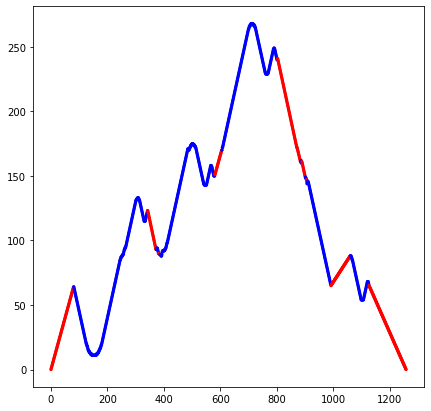

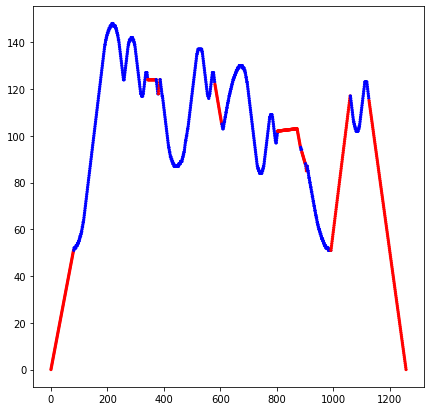

In [ ]:

"""

%matplotlib inline
import numpy as np

from matplotlib import pyplot as plt
from numpy import invert, ndarray ,pi
import numpy
from scipy import ndimage
import skimage
from skimage.morphology import skeletonize
from skimage.morphology import thin
from skimage.morphology import medial_axis
from skimage.io import imread,imshow
from skimage.filters import threshold_otsu
from skimage.measure import regionprops, label
from scipy.ndimage.morphology import distance_transform_edt
import networkx as nx

from matplotlib import collections as mc
from matplotlib.animation import FuncAnimation
import matplotlib.animation as ani
import random
from random import random
from scipy.ndimage import gaussian_filter
from time import sleep
import sys
from skimage import transform

im1=imread('/content/drive/MyDrive/research paper/path4.jpg')
img=im1

T=0


try:
 
 img=skimage.color.rgb2gray(img)
 imgg=img
 
except:
 print("An exception occurred")
    
sig=0.01

print(img.shape)
a,b=img.shape
#resize the image :
#######################################################
scale1=350
sca=scale1/(a**2+b**2)**.5 
img = skimage.transform.resize(img, (int(a*sca), int(b*sca)),anti_aliasing=False)
img1=img

a,b=img.shape

sizeim=img.shape


#thresholing the the image :
#######################################################


thresh=threshold_otsu(img) #threshold value of the image
binary_img=img >thresh
binary_img=invert(binary_img) #threshold th image





#remove noise and small object
#######################################################
#generate multiple objects we select the biggest object 

#binary_img= ndimage.median_filter(binary_img, size=5)#remove noise
labels,labelnum=skimage.measure.label(binary_img, background=None, return_num=True, connectivity=None)
hist,bin_edges=np.histogram(labels,bins=labelnum+1)

sorted_hist=np.sort(hist)
print(hist,sorted_hist[-1])

maxi=np.where(hist==sorted_hist[-2])
maxi=maxi[0]

print("maxi= ",maxi)

binary_img=np.where(labels==maxi,1,0)  #select  the biggest object 


#skeletonize the image
#######################################################222

print("full skeletonization ?")
if(int(input())==True):
    skel_img=skeletonize( binary_img ) #skeletonize the image

else:
    ite=int(input("iteration"))
    skel_img=thin(binary_img, ite)



ar=np.where(skel_img,1,0) # convert the skeletonised image to numpy array
 




#######################################################



# register the points representing the skeletonised image in the P array , P from points
#######################################################

x,y=np.where(ar==0)
P=np.stack((x,y),axis=1)

# p contain points coordinate value that repesent the skeletonised image
#######################################################



#GRAPH__________________________
#######################################################
import time

t0 = time.time()
ss=1
G = nx.grid_2d_graph(int(ss*a),int(ss*b))

t_add_edge0=time.time()
#create king's graph
if(True):
    G.add_edges_from([((x, y), (x+1, y+1)) for x in range(a-1) for y in range(b-1)]
    + [((x+1, y), (x, y+1))for x in range(a-1) for y in range(b-1)])





P=tuple(map(tuple,(ss*P).astype(np.int16)))
G.remove_nodes_from(P)

MG=nx.MultiGraph(G)

MG.add_edges_from(G.edges) #double every edge in the graph so it will be euler graph

#MG is the graph representation of the skeletonised image where each pixel transform to node 
#generate links between the nieberhood pixels

# we can imagine the skeletonised image as big city where node is an intersection and link is a road


t_add_edge1=time.time() # used to compute the time for convert the image to graph and eulerize it

print("time creating graph= ",t_add_edge1-t_add_edge0)
tf=nx.is_eulerian(MG) 

print(tf)

path=nx.eulerian_circuit(MG)
#######################################################

t1 = time.time()



total = t1-t0


print("totla=",total)


#create two signals X Y from the path:
#######################################################
path=list(path)
points=[]
for i in path:
    points.append(i[0])



points=np.array(points)
X= points[:,0]
Y= points[:,1]
linesx=[]
linesy=[]
linesonoff=[]
#add segment line for the origin point to the start of the path 
#and onother segmnt from the end of the path to the origin point:
#######################################################
if(True):


    lengtho=int((X[0]**2+Y[0]**2)**(1/2))
    

    ostartx=np.linspace(0, int(X[0]), num=1, endpoint=False)
    ostarty=np.linspace(0, int(Y[0]), num=1, endpoint=False)
    X=np.concatenate((ostartx, X), axis=None)
    X=np.concatenate((X, ostartx[::-1]), axis=None)
    Y=np.concatenate((ostarty, Y), axis=None)
    Y=np.concatenate((Y, ostarty[::-1]), axis=None)
    points=np.vstack((X,Y)).T

if(True):
        
    lastp=points[-1]

    

 #make the element of the path unique
    new_array = [tuple(row) for row in points]
   
    uni_points,indexes = np.unique(new_array,axis=0,return_index=True)
   
    unsort_uni_points=np.zeros(shape=(len(indexes),2))
    sorted_ind=sorted(indexes)
    for i in range(len(sorted_ind)):
        ii=sorted_ind[i]
        unsort_uni_points[i]=points[ii]
        

    #print("points = ",uni_points)
    X= unsort_uni_points[:,0]
    Y= unsort_uni_points[:,1]

    #print("asdsadas xand y : ",X,Y)
    firstp=uni_points[0]
    Xnew=[]
    Ynew=[]
    X[-1]=lastp[0]
    Y[-1]=lastp[1]
    

    ###########################
    #generate points between the segments "Linear  interpolation "
    timelen=[0]
    coloronoff=[1]
    for i in range(len(X)-1):

        lengthpiece=((X[i+1]-X[i])**2+(Y[i+1]-Y[i])**2)**0.5
        timelen=np.append(timelen, lengthpiece)
        timelen[i+1]=timelen[i+1]+timelen[i]


        
        xpiece = np.linspace(X[i],X[i+1], int(lengthpiece ), endpoint=True)
        ypiece = np.linspace(Y[i],Y[i+1], int(lengthpiece ), endpoint=True)
        Xnew=np.concatenate((Xnew, xpiece), axis=None)
        Ynew=np.concatenate((Ynew, ypiece), axis=None)
        if(lengthpiece > 3):
            linesx=np.concatenate((linesx, xpiece), axis=None)
            linesy=np.concatenate((linesy, ypiece), axis=None)
            linesonoff=np.concatenate((linesonoff, np.ones(int(lengthpiece))), axis=None)
            coloronoff=np.append(coloronoff, 1)
        else:
            linesonoff=np.concatenate((linesonoff, np.zeros(int(lengthpiece))), axis=None)
            coloronoff=np.append(coloronoff, 0)

#plt.scatter(timelen,X,c=list(map(lambda x:'blue' if x==1 else 'red',coloronoff)))
#plt.show()
#plt.scatter(timelen,Y)
#plt.show()
X=Xnew
Y=Ynew



X=gaussian_filter(X,sigma=sig ,mode='reflect')  # used to remove the noise 
Y=gaussian_filter(Y,sigma=sig ,mode='reflect')

plt.figure(figsize=(7, 7))

colorss=np.array(list(map(lambda x:'red' if x==1 else "blue",linesonoff)))

plt.scatter(np.arange(len(Y)),Y,s=5,c=colorss)

plt.show()
plt.figure(figsize=(7, 7))
plt.scatter(np.arange(len(X)),X,s=5,c=colorss)





"""
